In [25]:
import numpy as np
import gym
import math
import torch as T
import random
from EnvGym import MyEnv
from sac_agent import SAC_Agent
import time
import matplotlib.pyplot as plt

In [26]:
s0 = 100 # initial mid-price

T = 1 # terminal time

sigma = 2 # volatility

gamma = 0.1 # risk aversion parameter

k = 1.5 # k = alpha*K and this is determined by the market order size

A = 140 # scaling factor that depends on frequency  of market buy or sell orders and market order size

N_prices = 200

dt = 1/ N_prices # time step

In [27]:
env = MyEnv(s0, sigma, dt, N_prices, A, k)

# agent = SAC_Agent([3], env=env, memory_size=30000, alpha= 0.0008, beta= 0.0008, tau = 0.0006, reward_scale=5, batch_size=16)
agent = SAC_Agent([3], env=env, memory_size=50000, alpha= 0.008, beta= 0.008, tau = 0.0005, reward_scale=5, batch_size=265)


train_start = time.time()
epochs_start = time.time()

epoch_num = 100


train_rewards = np.empty(shape=epoch_num)
for epoch in range(epoch_num):

    states_before, actions, rewards, states_next, dones = [], [], [], [], []

    # print("EPOCH: ", epoch)
    
    env.reset()


    # --------------------------------------------- now i have state I am at now
    done = False
    while not done:

        # print("State now: ", env.state_now)

        action = agent.pick_action(env.state_now)
        # print("ACTION: ", action)
        state_now = env.state_now
   
        # --------------------------------------------- now i also have action I would like to take
            
        state_next, reward, done, _, _ = env.step(action)

        # print("State I arrived: ", env.state_now)
        # print("Real state I arrived: ", env.state_now[0]*100, env.state_now[1], env.state_now[2]*100)
        # print("Reward I gained: ", reward)

        # if reward>=0:
        #     reward *=2 
        states_before.append(state_now)       
        actions.append(action)       
        rewards.append(reward)       
        states_next.append(state_next)       
        dones.append(done)       
       
        agent.remember(state_now, action, reward, state_next, done)
    # print("Total reward: ", env.reward_total)
    agent.learn()

    # check if actions are the same always, by checking if std is 0
    print("Std of actions: ", np.std(actions))

    # save cumulative reward for epoch
    train_rewards[epoch] = env.reward_total
    print(env.reward_total)
    # print()


Std of actions:  0.016614532
-51.171383548782025
Std of actions:  0.0164672
-55.16807415116978
Std of actions:  0.12341082
-486.56143781974384
Std of actions:  0.048999444
-218.64750339963533
Std of actions:  0.032350995
-38.50916828359794
Std of actions:  0.066965275
-252.1346765763391
Std of actions:  0.065143615
-297.3663756404603
Std of actions:  0.047392137
-90.41950621467998
Std of actions:  0.026527783
-72.18347971271837
Std of actions:  0.021494012
-121.75685678841853
Std of actions:  0.03653543
-144.71520873034754
Std of actions:  0.05776411
-380.69673789323883
Std of actions:  0.07778345
-528.2989936125698
Std of actions:  0.09523913
-576.6378623244443
Std of actions:  0.111333005
-608.9978395604732
Std of actions:  0.10759314
-678.7030576069229
Std of actions:  0.08159406
-439.33759474523663
Std of actions:  0.056189936
-567.2281306255279
Std of actions:  0.04291746
-306.5173646702927
Std of actions:  0.061795227
-444.5404794541078
Std of actions:  0.1081626
-409.04166062840

In [28]:
train_rewards
epoch
# np.mean(train_rewards)


99

Mean of every 100 elements: [-168.39184621355452, -467.56732692231617, -224.01908330646478, -419.67618759503466, -640.3024061484629, -250.2507869762473, -163.0855834629904, -108.86386622672133, -119.62716106245686, -136.93522994424393]


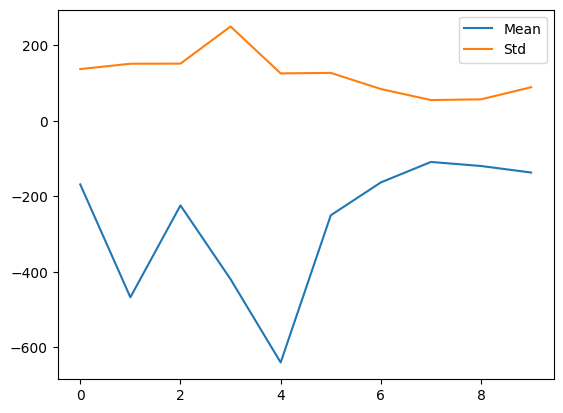

In [29]:
# train_rewards = train_rewards[:300]
chunks = [train_rewards[i:i+10] for i in range(0, len(train_rewards), 10)]

# Calculate the mean of each chunk
means = [np.mean(chunk) for chunk in chunks]

# Print the std of each chunk
stds = [np.std(chunk) for chunk in chunks]

print("Mean of every 100 elements:", means)

# plot the mean and std of each chunk
plt.plot(means, label='Mean')
plt.plot(stds, label='Std')
plt.legend()
plt.show()


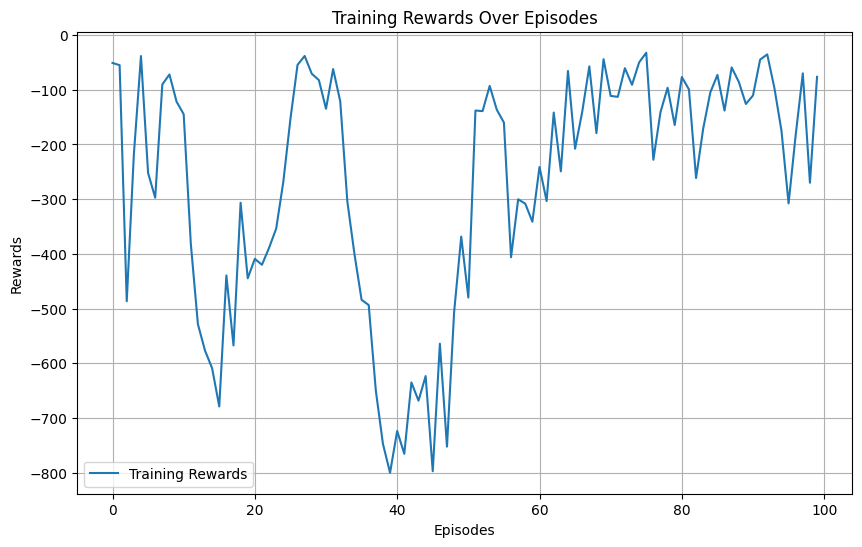

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(train_rewards,  label='Training Rewards', linestyle='-')
plt.title('Training Rewards Over Episodes')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()
plt.grid(True)
plt.savefig('training_rewards_plot.png')
plt.show()

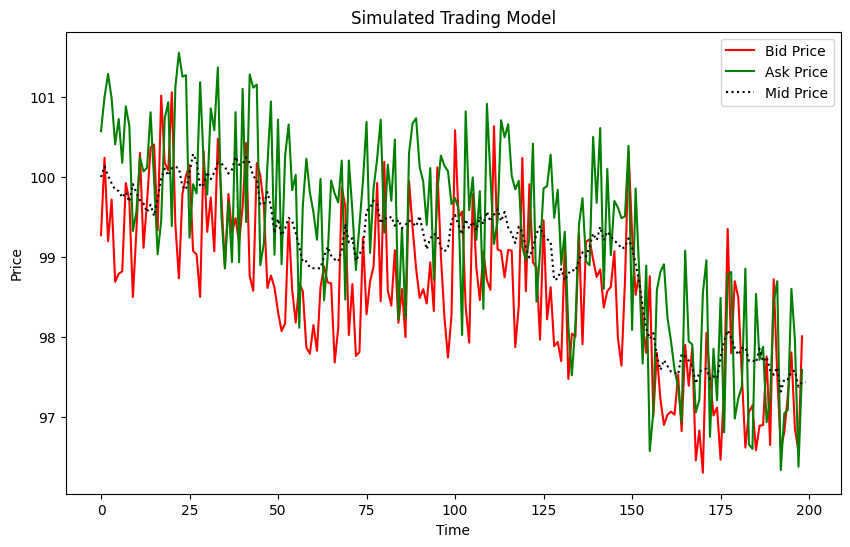

In [31]:
plt.figure(figsize=(10, 6))
# plt.plot(t, res_price_array, label='Res Price')

plt.plot(env.Bid, label='Bid Price', color='red', linestyle='-')
plt.plot(env.Ask, label='Ask Price', color='green', linestyle='-')
plt.plot(env.s, label='Mid Price', color='black', linestyle='dotted')

plt.title('Simulated Trading Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

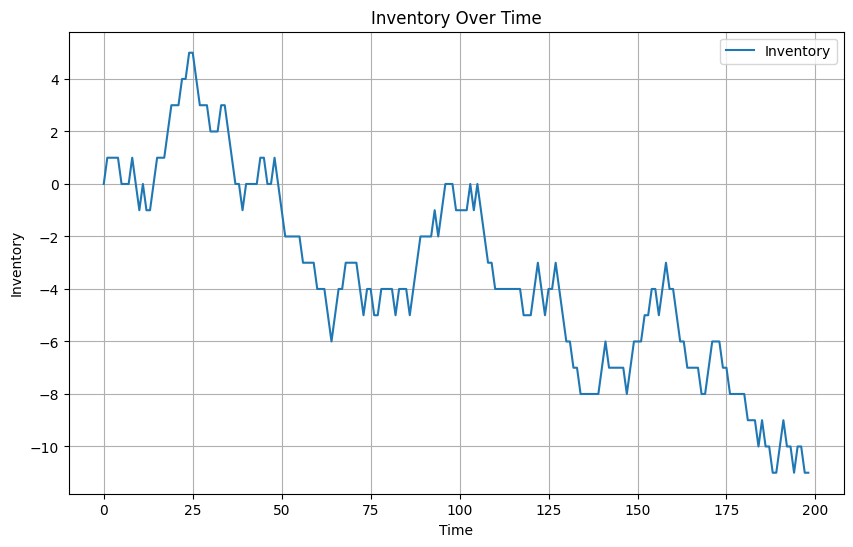

In [32]:
# plot invetory_array
plt.figure(figsize=(10, 6))
plt.plot(env.inventory_array, label='Inventory')
plt.title('Inventory Over Time')
plt.xlabel('Time')
plt.ylabel('Inventory')
plt.legend()
plt.grid(True)
plt.show()